# Optuna Studies: LeNet-5 x FashionMNIST

*Version History*

* **8.0** - Analyze results of first Optuna run (StepLR &rarr; RandomSampler + MedianPruner)


## Imports

In [1]:
import matplotlib.pyplot as plt
import optuna
import pandas as pd

from src.utils.data import parse_optuna_study
from src.utils.ped_anova import (
    compute_hpi,
    compute_marginal_gamma_set_pdfs,
    plot_marginal_pdfs
)
from src.visualization.saving import save_figure

## Revisiting StepLR & Basic Augmentation


### RandomSampler + MedianPruner

* ``n_trials`` &rarr; 500
* ``RandomSampler``
* ``MedianPruner`` &rarr; 10 startup trials, 5 warmup steps

In [2]:
# Load and prepare data
step_lr_random_median_log = parse_optuna_study(
    "../out/lenet_fashionmnist/hparam_tuning/optuna/step_lr_random_median/2024-11-08_07-53-02/logs/train_classifier_optuna.log",
    mode="val"
)
step_lr_random_median_log = step_lr_random_median_log.drop(columns="Accuracy@5")
step_lr_random_median_log = step_lr_random_median_log.rename(columns={
    "dataloader.batch_size": "batch_size",
    "main_scheduler.lr_gamma": "lr_gamma",
    "main_scheduler.lr_step_size": "lr_step_size",
    "optimizer.lr": "lr",
    "optimizer.momentum": "momentum",
    "optimizer.weight_decay": "weight_decay",
    "transform.train.crop_ratio.lower": "crop_ratio.lower",
    "transform.train.crop_scale.lower": "crop_scale.lower",
    "Accuracy@1": "Acc@1"
})
step_lr_random_median_log = step_lr_random_median_log.sort_values(by="Loss")
step_lr_random_median_log.head(10)

,trial_id,pruned,batch_size,lr_gamma,lr_step_size,lr,momentum,weight_decay,crop_ratio.lower,crop_scale.lower,Loss,Acc@1,Epochs
456,457,False,128,0.6809,19,0.0513,0.4993,0.0000,0.7800,0.7732,0.255,0.904,58
420,421,False,128,0.4833,34,0.0752,0.3811,0.0000,0.9398,0.7245,0.258,0.904,47
179,180,False,256,0.3713,27,0.0429,0.6848,0.0003,0.9458,0.8151,0.259,0.906,55
56,57,False,256,0.5202,29,0.0720,0.7317,0.0001,0.7691,0.8566,0.260,0.903,59
410,411,False,32,0.3154,46,0.0114,0.4892,0.0002,0.8875,0.9107,0.260,0.907,47
489,490,False,128,0.7393,43,0.0397,0.6207,0.0006,0.8145,0.9214,0.261,0.907,44
235,236,False,64,0.2284,12,0.0664,0.5640,0.0001,0.7932,0.7858,0.263,0.901,33
361,362,False,32,0.1297,23,0.0082,0.7115,0.0000,0.7696,0.8136,0.263,0.901,37
486,487,False,64,0.1945,35,0.0118,0.7990,0.0020,0.9497,0.7996,0.264,0.901,51
292,293,False,128,0.3322,32,0.0338,0.7022,0.0009,0.9624,0.8380,0.265,0.902,33


In [3]:
# Load study results from database
step_lr_random_median_study = optuna.load_study(
    study_name="lenet_fashionmnist/hparam_tuning/optuna/step_lr_random_median/2024-11-08_07-53-02",
    storage="sqlite:///../optuna_studies.sqlite3"
)

# Compute local HPI with gamma' = 0.1 and gamma = 1.0
global_hpi = compute_hpi(
    step_lr_random_median_study,
    gamma_prime=0.1,
    normalize=True,
    params=[
        "main_scheduler.lr_gamma",
        "optimizer.momentum",
        "transform.train.crop_ratio.lower",
        "transform.train.crop_scale.lower"
    ]
)

# Convert results to DataFrame
for k in global_hpi:
    global_hpi[k] = round(global_hpi[k] * 100, 1)
global_hpi_df = pd.DataFrame(list(global_hpi.items()), columns=["Parameter", "HPI"])
global_hpi_df = global_hpi_df.sort_values(by=["HPI"], ascending=False)
global_hpi_df

,Parameter,HPI
3,transform.train.crop_scale.lower,48.4
1,optimizer.momentum,20.9
2,transform.train.crop_ratio.lower,17.8
0,main_scheduler.lr_gamma,12.8


### Plotting Marginal PDFs

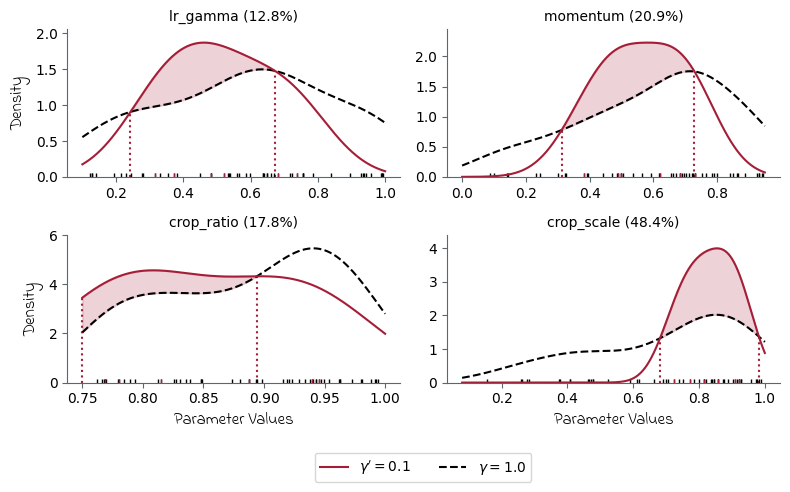

In [4]:
fig, axes = plot_marginal_pdfs(
    step_lr_random_median_study,
    gamma_prime=0.1,
    params=[
        "main_scheduler.lr_gamma",
        "optimizer.momentum",
        "transform.train.crop_ratio.lower",
        "transform.train.crop_scale.lower"
    ],
    params_aliases=[
        "lr_gamma",
        "momentum",
        "crop_ratio",
        "crop_scale"
    ],
    normalize=True,
    fig_layout=(2, 2)
)
plt.show()

In [5]:
save_figure(
    fig,
    "../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/hpi_random_median.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/hpi_random_median.png.


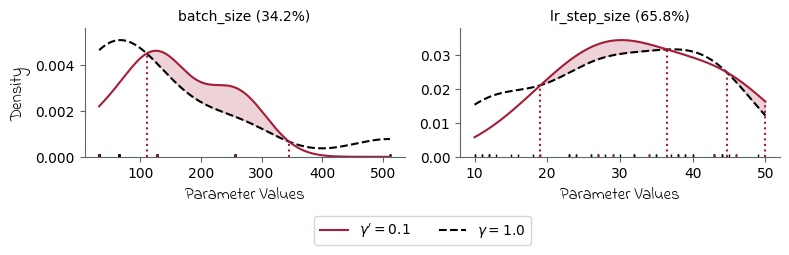

In [6]:
fig, axes = plot_marginal_pdfs(
    step_lr_random_median_study,
    gamma_prime=0.1,
    params=[
        "dataloader.batch_size",
        "main_scheduler.lr_step_size"
    ],
    params_aliases=[
        "batch_size",
        "lr_step_size"
    ],
    normalize=True
)

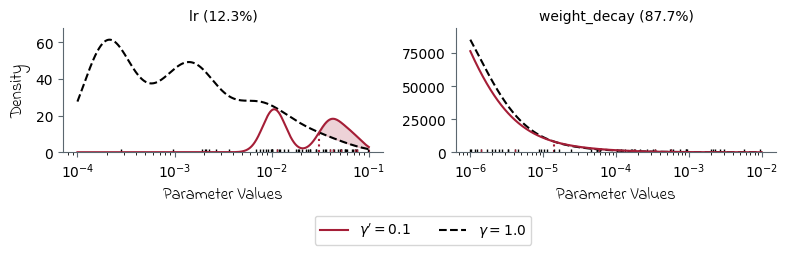

In [7]:
fig, axes = plot_marginal_pdfs(
    step_lr_random_median_study,
    gamma_prime=0.1,
    params=[
        "optimizer.lr",
        "optimizer.weight_decay"
    ],
    params_aliases=[
        "lr",
        "weight_decay"
    ],
    normalize=True
)